# Glacier Mass Balance Data Analysis

This notebook imports, analyzes, and visualizes the data within this dataset, collected from wgms.ch

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
from scipy.interpolate import (
    CubicSpline,
)

In [14]:
# Import the original glacier mass balance dataset
dfOriginal = pd.read_csv('C:/Users/Stefa/OneDrive/Documents/NumericalComputationProject/data/DOI-WGMS-FoG-2025-02/data/mass_balance.csv')
dfOriginal = pd.DataFrame(dfOriginal)
# Display the original data's information
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8572 entries, 0 to 8571
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8572 non-null   object 
 1   glacier_name        8572 non-null   object 
 2   glacier_id          8572 non-null   int64  
 3   outline_id          45 non-null     float64
 4   year                8572 non-null   int64  
 5   time_system         4562 non-null   object 
 6   begin_date          6491 non-null   object 
 7   begin_date_unc      6491 non-null   float64
 8   midseason_date      3920 non-null   object 
 9   midseason_date_unc  3920 non-null   float64
 10  end_date            6526 non-null   object 
 11  end_date_unc        6526 non-null   float64
 12  winter_balance      5012 non-null   float64
 13  winter_balance_unc  911 non-null    float64
 14  summer_balance      4990 non-null   float64
 15  summer_balance_unc  878 non-null    float64
 16  annual

In [29]:
# Filter the dataframe to include only the glaciers in the US
dfUS = dfOriginal[dfOriginal['country'] == 'US']

# Display the head of the US dataframe
print(dfUS.head())

# Print distinct glaciers in the US dataset
print("\nUS Glaciers: \n", dfUS['glacier_name'].unique())


     country glacier_name  glacier_id  outline_id  year    time_system  \
7447      US      ANDREWS        1341         NaN  1970            NaN   
7448      US      ARAPAHO        1354         NaN  1970            NaN   
7449      US      ARAPAHO        1354         NaN  1971  stratigraphic   
7450      US      ARAPAHO        1354         NaN  1972  stratigraphic   
7451      US      ARAPAHO        1354         NaN  1973  stratigraphic   

      begin_date  begin_date_unc midseason_date  midseason_date_unc  ...  \
7447  1969-07-02           182.0            NaN                 NaN  ...   
7448  1969-07-02           182.0            NaN                 NaN  ...   
7449  1970-07-02           182.0            NaN                 NaN  ...   
7450  1971-07-02           182.0            NaN                 NaN  ...   
7451  1972-07-01           182.5            NaN                 NaN  ...   

     annual_balance_unc  ela_position     ela  ela_unc  aar      area  \
7447                NaN  

['BLACK RAPIDS' 'BLUE GLACIER' 'COLUMBIA (2057)' 'DANIELS' 'EASTON' 'FOSS'
 'GULKANA' 'ICE WORM' 'LEMON CREEK' 'LOWER CURTIS' 'LYNCH' 'NOISY CREEK'
 'NORTH KLAWATTI' 'RAINBOW' 'SANDALEE' 'SHOLES' 'SILVER' 'SOUTH CASCADE'
 'SPERRY' 'TAKU' 'WOLVERINE' 'YAWNING']


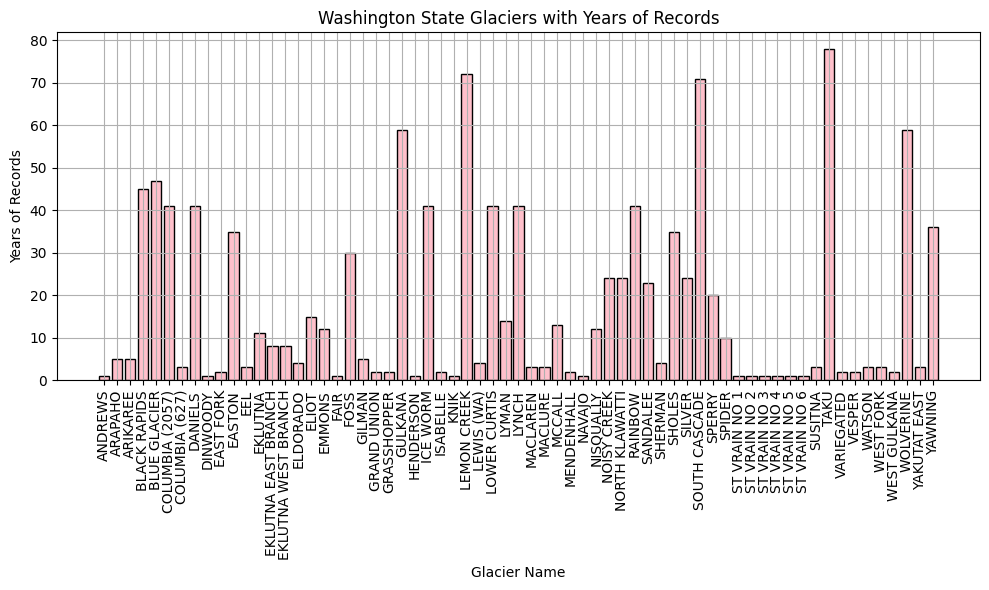

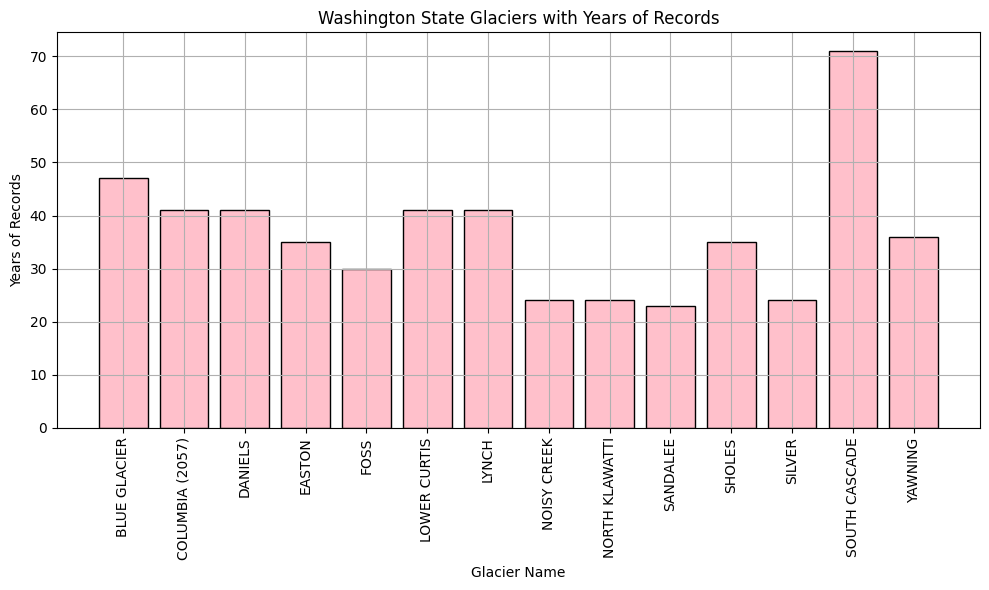

In [ ]:
# This function utilizes an updated dataframe that only consists of US glaciers.
# It returns the number of years of data recorded for each glacier
def filter_glaciers(USGlacier_df):
    
    # Initialize an empty dictionary to store glacier names and their respective year counts
    glaciers_dict = {}
    
    # Iterate through each unique glacier in the US
    for glacier in USGlacier_df['glacier_name'].unique():
        
        # Calculate the sum of years of data recorded for each glacier
        years = (USGlacier_df['glacier_name'] == glacier).sum()
        
        # Append the glacier name and its respective year count to the dictionary
        glaciers_dict[glacier] = years
        
    return glaciers_dict

# Extract the US glaciers and their respective years of data recorded and store them in a dictionary
glaciers_dict = filter_glaciers(dfUS)

# Compute the mean of the years of data recorded for all US glaciers
totalYears_mean = stats.mean(glaciers_dict.values())

# Iterate through the US glacier dictionary and append glaciers to keep within the dataframe based on the
# mean of years of data recorded threshold
keepGlaciers = [glacier for glacier, years in glaciers_dict.items() if years >= totalYears_mean]

# Update the dataframe to only include glaciers that meet the threshold
dfUS = dfUS[dfUS['glacier_name'].isin(keepGlaciers)]
print(dfUS['glacier_name'].unique())

# Filter the remaining glaciers to only include those that reside in Washington State
dropGlaciers = ["BLACK RAPIDS", "ELIOT", "GULKANA", "ICE WORM", "LEMON CREEK", "RAINBOW", "SPERRY", "TAKU", "WOLVERINE"]
dropGlaciersIndices = dfUS[dfUS['glacier_name'].isin(dropGlaciers)].index

# Create a new dataframe that excludes the glaciers that are not in Washington State
WashingtonGlaciers_df = dfUS.drop(dropGlaciersIndices)

# Extract the unique glacier names from the dataframe
WA_Glaciers = WashingtonGlaciers_df['glacier_name'].unique()

# Plot the number of years of data recorded for each US glacier in the dataset
plt.figure(figsize=(10, 6))
plt.bar(glaciers_dict.keys(), glaciers_dict.values(), color='pink', edgecolor='black')
plt.title('US Glaciers with Years of Records')
plt.xlabel('Glacier Name')
plt.xticks(rotation = 90)
plt.ylabel('Years of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

# Initialize an empty list to store the years of data recorded for each glacier in Washington State
years = []

# Iterate through each WA glacier and append the years of data recorded to the list
for glacier in WA_Glaciers:
    years.append(glaciers_dict[glacier])

# Plot the number of years of data recorded for each glacier in Washington State
plt.figure(figsize=(10, 6))
plt.bar(WA_Glaciers, years, color='pink', edgecolor='black')
plt.title('Washington State Glaciers with Years of Records')
plt.xlabel('Glacier Name')
plt.xticks(rotation = 90)
plt.ylabel('Years of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

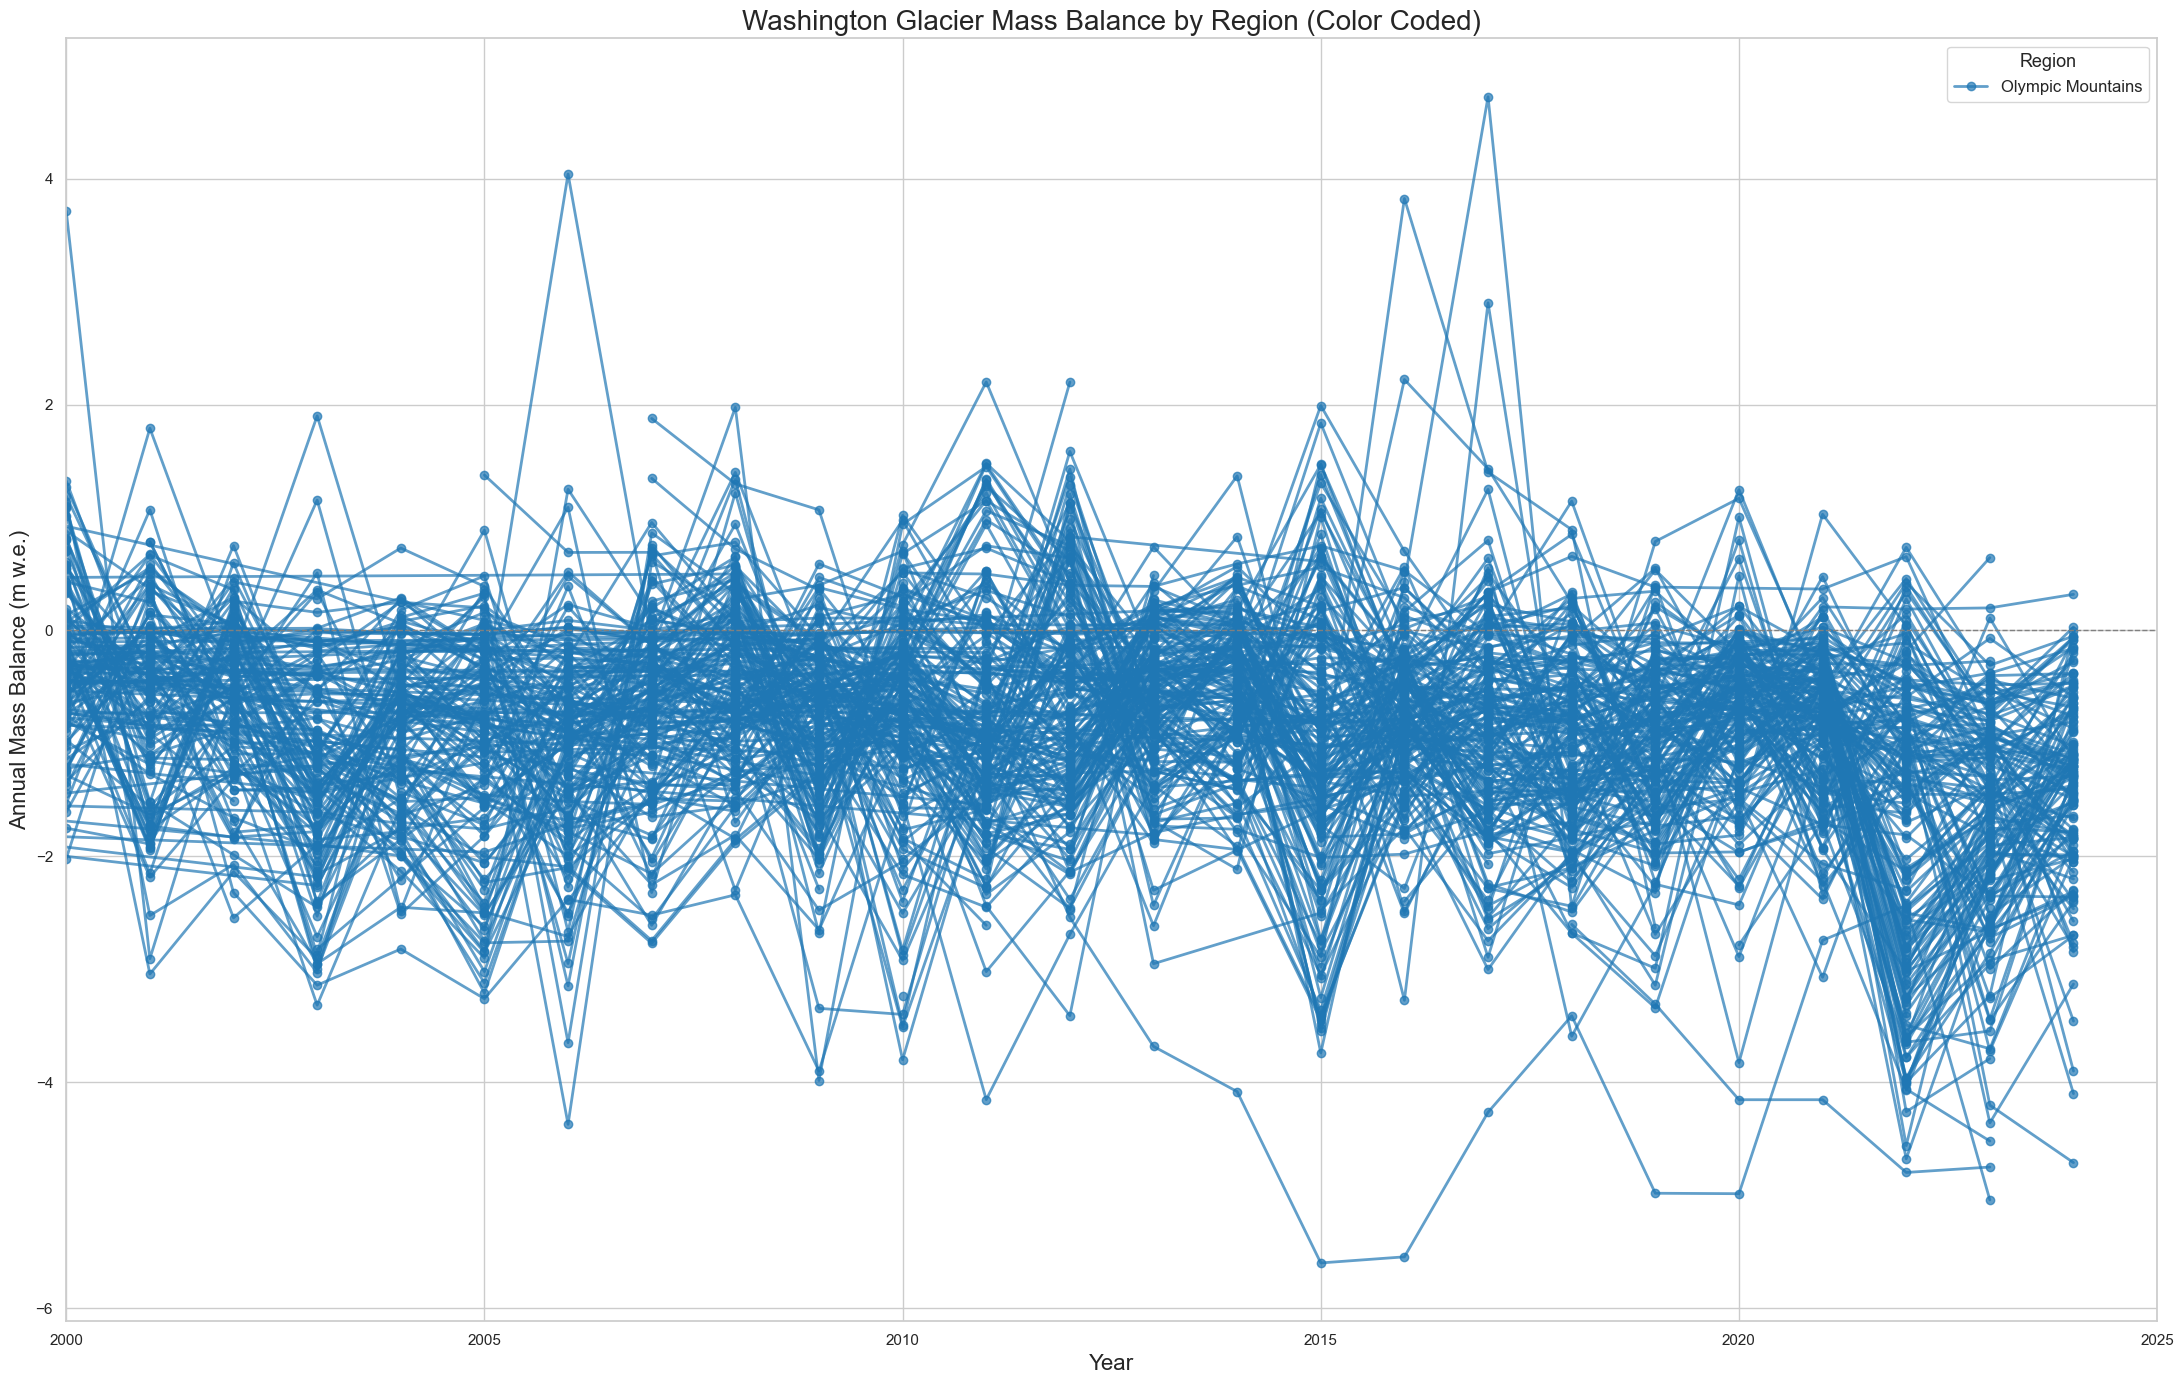

In [45]:
# Map the glacier names to their respective regions in Washington State
WA_glacier_region_map = {
    'BLUE GLACIER': 'Olympic Mountains',
    'COLUMBIA (2057)': 'Central Cascades',
    'DANIELS': 'Central Cascades',
    'EASTON': 'North Cascades',
    'FOSS': 'Central Cascades',
    'LOWER CURTIS': 'North Cascades',
    'LYNCH': 'Central Cascades',
    'NOISY CREEK': 'North Cascades',
    'NORTH KLAWATTI': 'North Cascades',
    'SANDALEE': 'North Cascades',
    'SHOLES': 'North Cascades',
    'SILVER': 'North Cascades',
    'SOUTH CASCADE': 'North Cascades',
    'YAWNING': 'North Cascades'
}

# Map the glacier names in the dataframe to their respective regions using the dictionary
WashingtonGlaciers_df['region'] = WashingtonGlaciers_df['glacier_name'].map(WA_glacier_region_map)

# Step 3: Define region colors
region_colors = {
    'Olympic Mountains': 'tab:blue',
    'North Cascades': 'tab:orange',
    'Central Cascades': 'tab:green'
}

# Step 4: Plot
plt.figure(figsize=(22, 14))

for glacier in df['glacier_name'].unique():
    glacier_df = df[df['glacier_name'] == glacier]
    region = WashingtonGlaciers_df['region'].iloc[0]
    color = region_colors.get(region, 'gray')
    
    plt.plot(
        glacier_df['year'],
        glacier_df['annual_balance'],
        marker='o',
        color=color,
        linewidth=2,
        alpha=0.7,
        label=region  # will be de-duplicated later
    )

# Horizontal reference line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and title
plt.title('Washington Glacier Mass Balance by Region (Color Coded)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Annual Mass Balance (m w.e.)', fontsize=16)
plt.xlim(2000, 2025)

# De-duplicate region labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Region', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

      year  annual_balance
7638  1990           -0.58
7639  1991            0.41
7640  1992           -1.67
7641  1993           -1.01
7642  1994           -0.92
7643  1995           -0.31
7644  1996            0.22
7645  1997            0.53
7646  1998           -1.87
7647  1999            1.61
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] [-0.58, 0.41, -1.67, -1.01, -0.92, -0.31, 0.22, 0.53, -1.87, 1.61, -0.1, -1.93, 0.18, -0.98, -1.06, -2.45, -0.79, 0.26, 0.45, -2.06, 0.68, 1.15, -0.16, -1.58, -1.3, -2.78, -0.82, -0.26, -0.5, -1.7, -0.633, -1.562, -1.216, -1.702, -1.64]


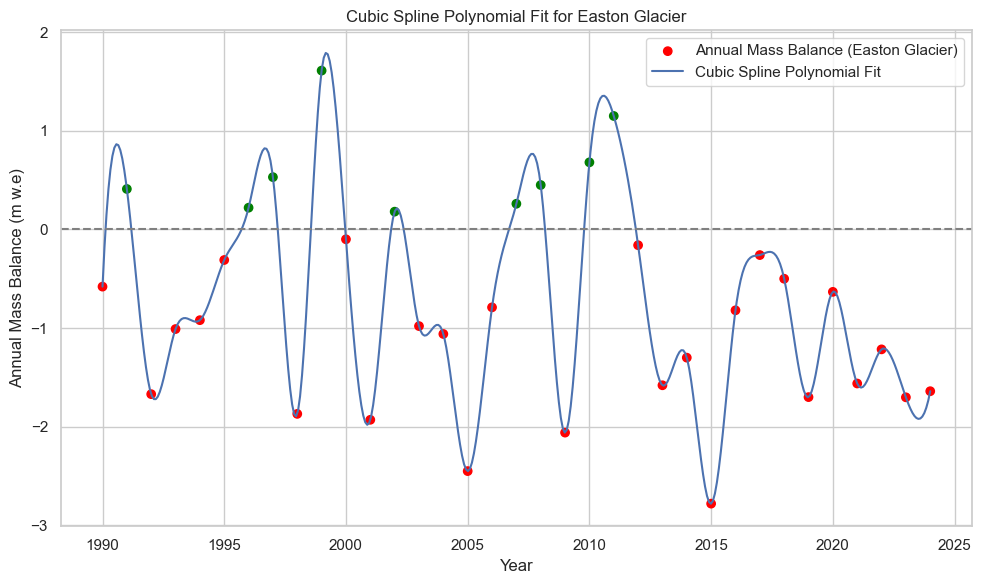

In [158]:
Easton_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == 'EASTON']
print(Easton_df[['year', 'annual_balance']].head(10))
x = [year for year, area in zip(Easton_df['year'], Easton_df['annual_balance']) if pd.notna(year) and pd.notna(area)]
y = [area for year, area in zip(Easton_df['year'], Easton_df['annual_balance']) if pd.notna(year) and pd.notna(area)]
print(x,y)
cs = CubicSpline(x, y)
print(cs)

# Convert the data's years to months for step size in smooth plotting 
years_to_months = len(x) * 12

# Step 2: Generate a smooth range of x values for plotting
x_smooth = np.linspace(np.min(x), np.max(x), years_to_months)

# Step 3: Evaluate the polynomial
y_smooth = cs(x_smooth)

# Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
colors = ['green' if massBalanceValue > 0 else 'red' for massBalanceValue in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Annual Mass Balance (Easton Glacier)', color=colors)
plt.plot(x_smooth, y_smooth, '-', label='Cubic Spline Polynomial Fit')
#plt.plot(x_smooth, Polynomial(lagrange_polynomial_SouthCascade.coef[::-1])(x_smooth), label='Polynomial')
plt.title('Cubic Spline Polynomial Fit for Easton Glacier')
plt.xlabel('Year')
plt.ylabel('Annual Mass Balance (m w.e)')
#plt.ylim(0, np.max(Easton_df['annual_balance'])*2)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The cell below iterates through each of the Washington glaciers that meet the required threshold of recorded observations (in years), and plots their respective glacial mass balance over time.

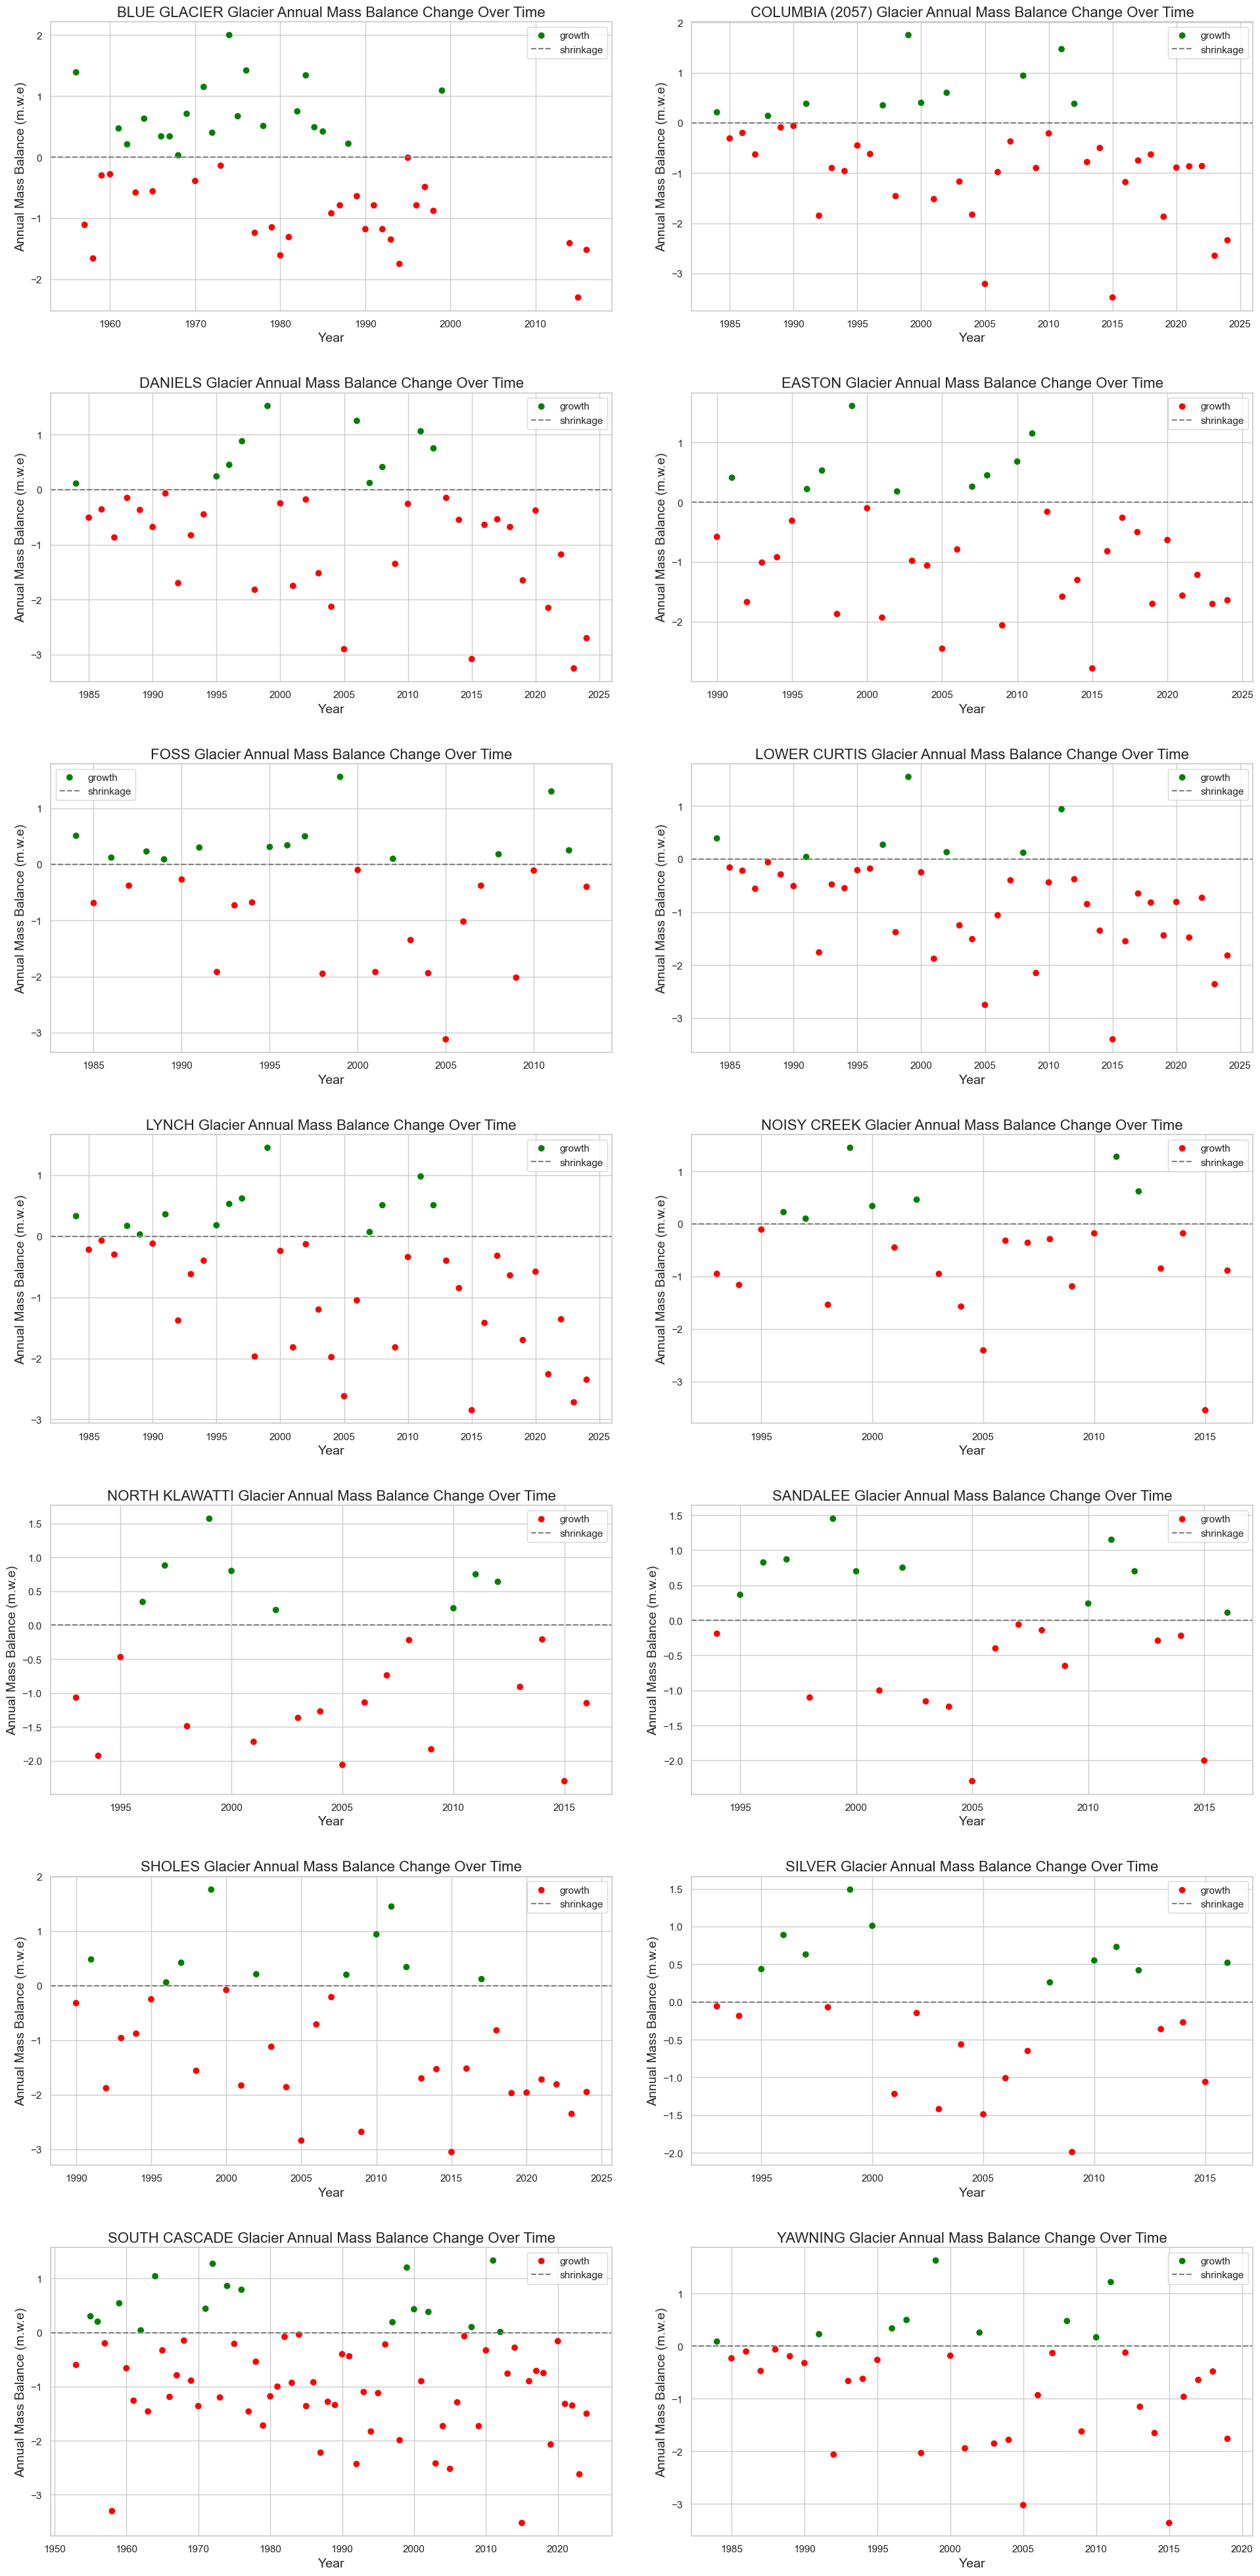

In [ ]:
# Initialize an empty dictionary to store the x and y values for each glacier 
# x: years, y: annual mass balance
glacierXY = {}

# Iterate through each glacier in the WA_Glaciers defined above
for glacier in WA_Glaciers:

    # Filter the dataframe to only include the current glacier for automated plotting purposes
    glacier_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == glacier]

    # Extract the years and annual mass balance values, only for entries that are both not NaN 
    x = [year for year, massBalance in zip(glacier_df['year'], glacier_df['annual_balance']) if pd.notna(year) and pd.notna(massBalance)]
    y = [massBalance for year, massBalance in zip(glacier_df['year'], glacier_df['annual_balance']) if pd.notna(year) and pd.notna(massBalance)]

    # Store the x and y values for each glacier in the 'glacierXY' dictionary
    glacierXY[glacier] = (x, y)

# Define the figure and axes for the subplots
fig, axes = plt.subplots(7, 2, figsize=(20, 40))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through each glacier for plotting
for i, glacier in enumerate(glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]

    # Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
    colors = ['green' if massBalanceValue > 0 else 'red' for massBalanceValue in y]

    # Plot the data for the current glacier
    axes[i].scatter(x, y, c=colors) 
    axes[i].set_title(f"{glacier} Glacier Annual Mass Balance Change Over Time", fontsize=16) 
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].set_ylabel('Annual Mass Balance (m w.e)', fontsize=14) 
    axes[i].axhline(0, color='gray', linestyle='--')
    axes[i].legend(['growth', 'shrinkage'])
    axes[i].grid(True)

# Ensure that the subplots are displayed correctly
plt.tight_layout(pad=3.0)
plt.show()


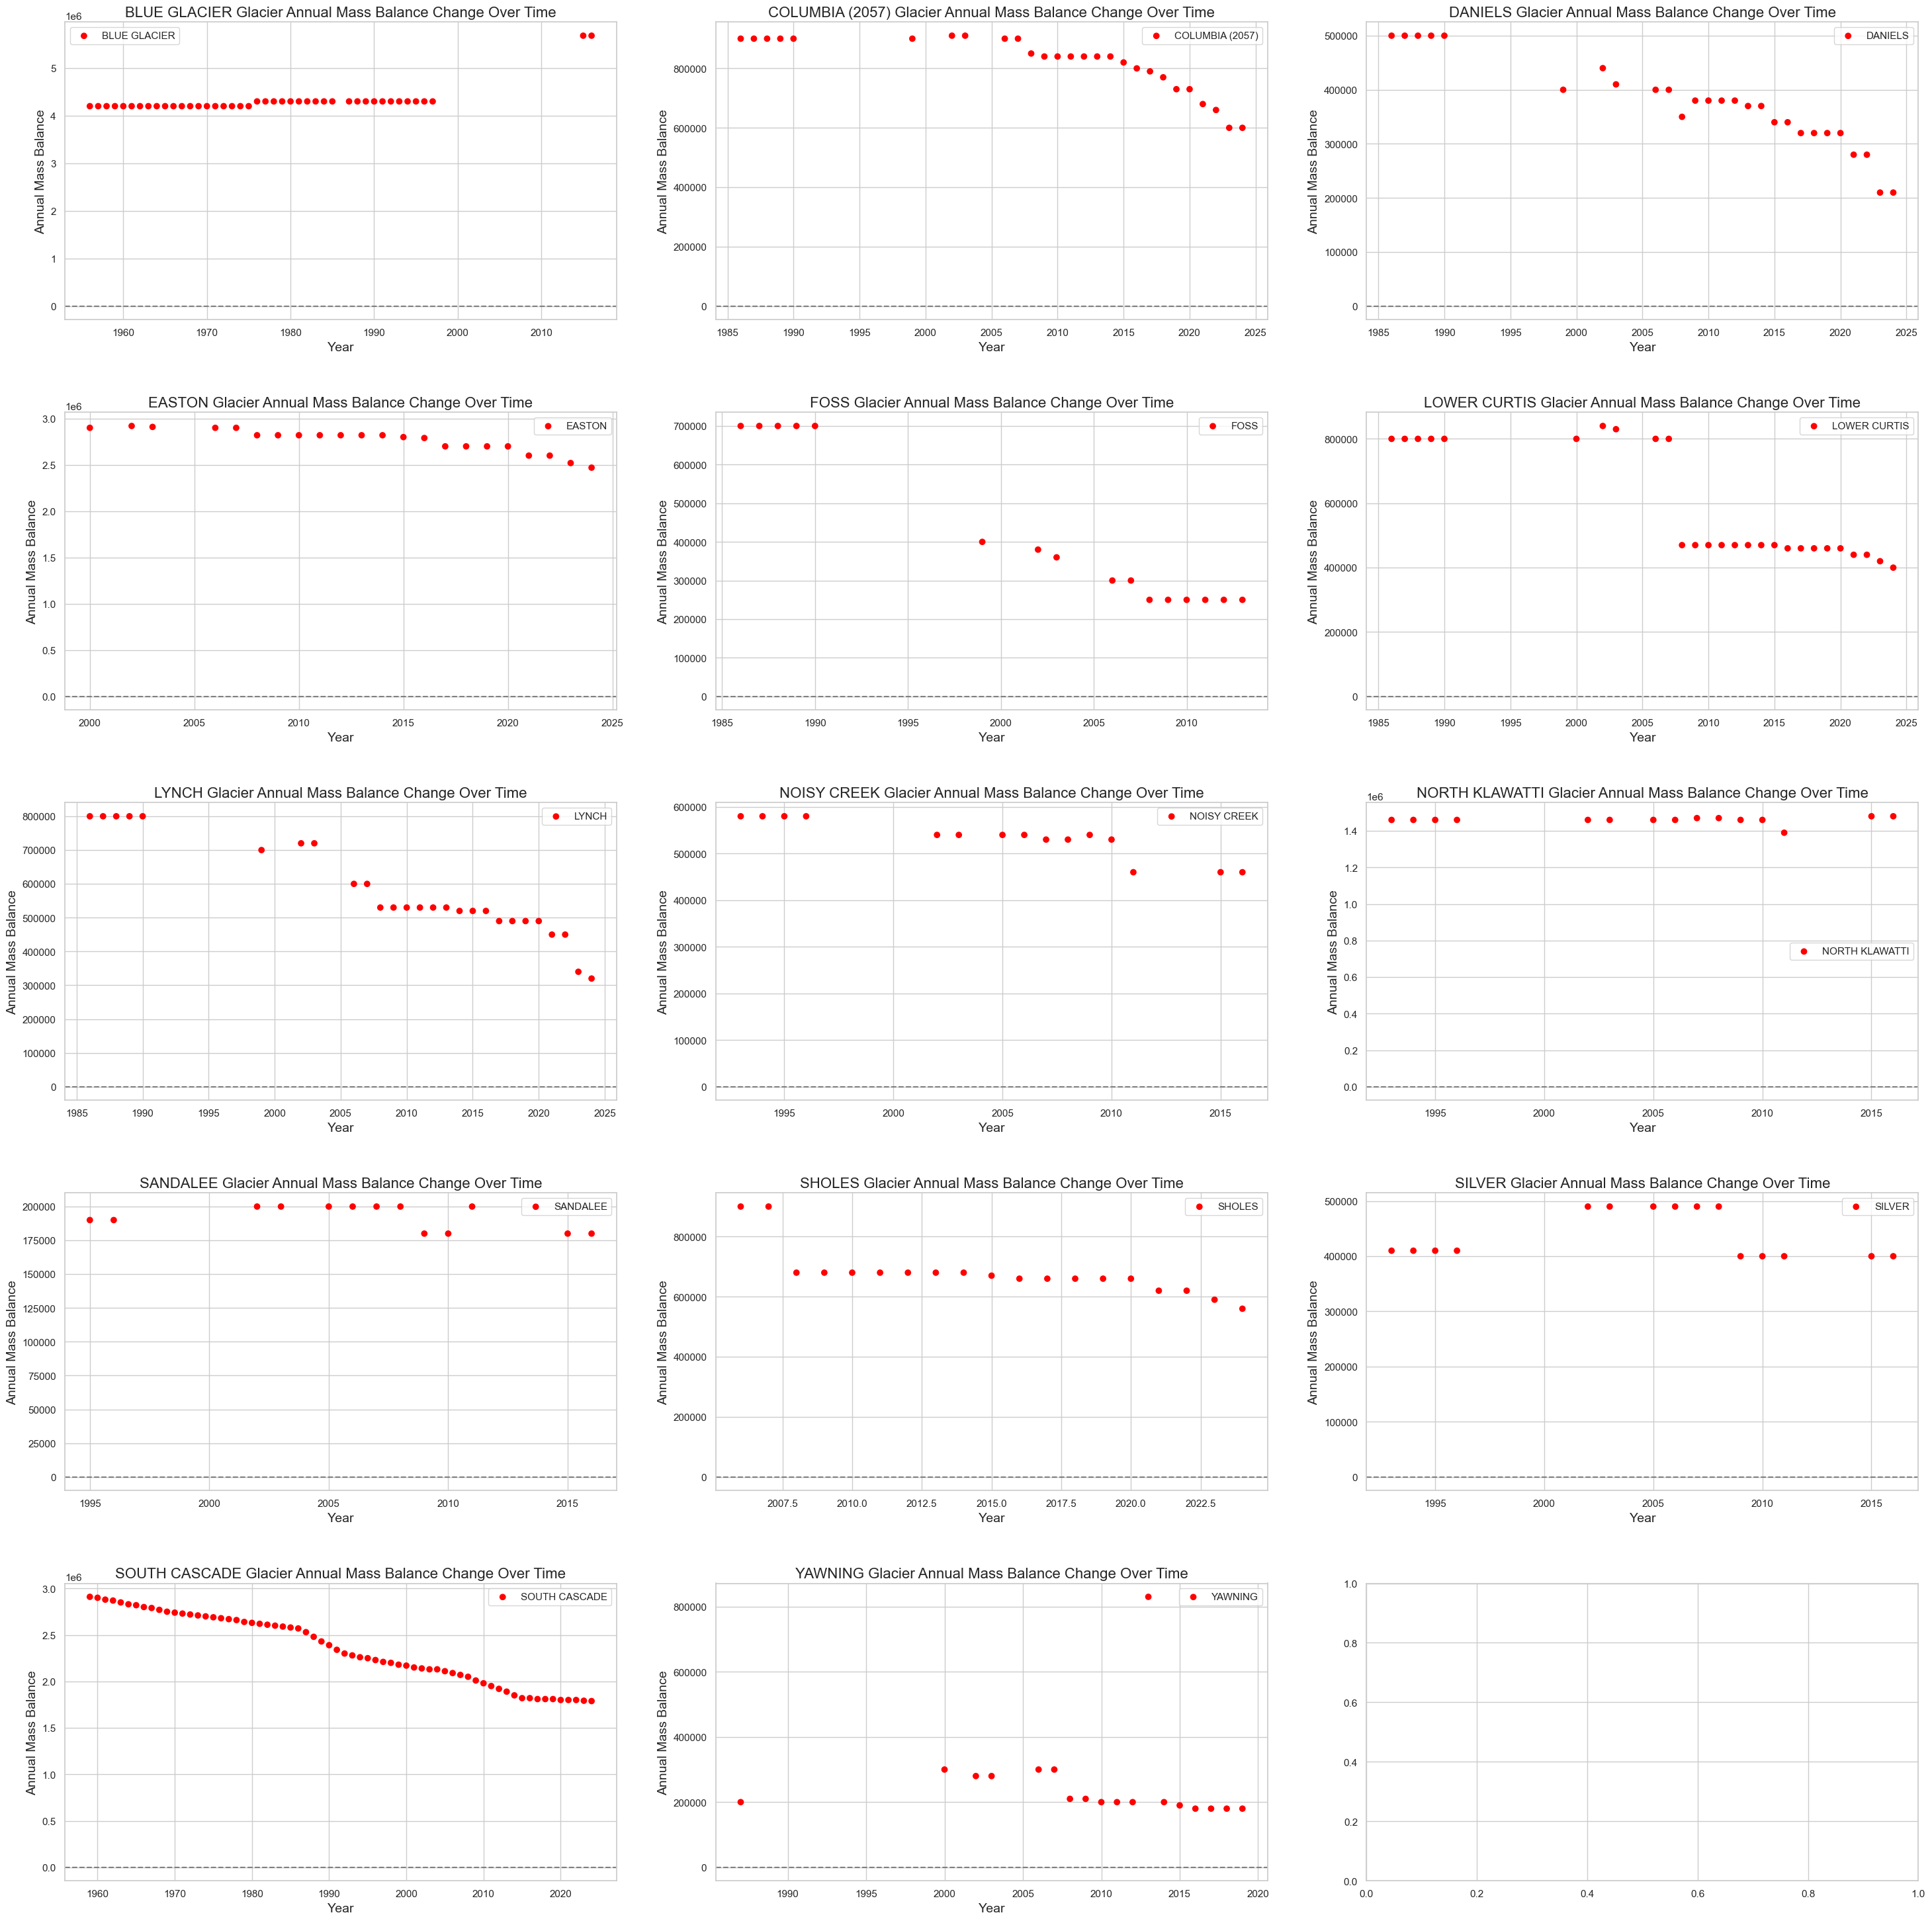

In [95]:
# Initialize an empty dictionary to store the x and y values for each glacier's area 
# x: years, y: annual mass balance
glacierAreaXY = {}

# Iterate through each glacier in the WA_Glaciers defined above
for glacier in WA_Glaciers:

    # Filter the dataframe to only include the current glacier for automated plotting purposes
    glacierArea_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == glacier]

    # Extract the years and annual mass balance values, only for entries that are both not NaN 
    x = [year for year, area in zip(glacierArea_df['year'], glacierArea_df['area']) if pd.notna(year) and pd.notna(area)]
    y = [area for year, area in zip(glacierArea_df['year'], glacierArea_df['area']) if pd.notna(year) and pd.notna(area)]

    # Store the x and y values for each glacier in the 'glacierXY' dictionary
    glacierAreaXY[glacier] = (x, y)

# Define the figure and axes for the subplots
fig, axes = plt.subplots(5, 3, figsize=(30, 30))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through each glacier for plotting
for i, glacier in enumerate(glacierAreaXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]

    # Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
    colors = ['green' if areaValue > np.mean(areaValue) else 'red' for areaValue in y]

    # Plot the data for the current glacier
    axes[i].scatter(x, y, label=glacier, color=colors) 
    axes[i].set_title(f"{glacier} Glacier Annual Mass Balance Change Over Time", fontsize=16) 
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].set_ylabel('Annual Mass Balance', fontsize=14) 
    axes[i].axhline(0, color='gray', linestyle='--')
    axes[i].legend()
    axes[i].grid(True)

# Ensure that the subplots are displayed correctly
plt.tight_layout(pad=3.0)
plt.show()


      year  annual_balance
8259  1953           -0.60
8260  1955            0.30
8261  1956            0.20
8262  1957           -0.20
8263  1958           -3.30
8264  1959            0.54
8265  1960           -0.66
8266  1961           -1.26
8267  1962            0.04
8268  1963           -1.46


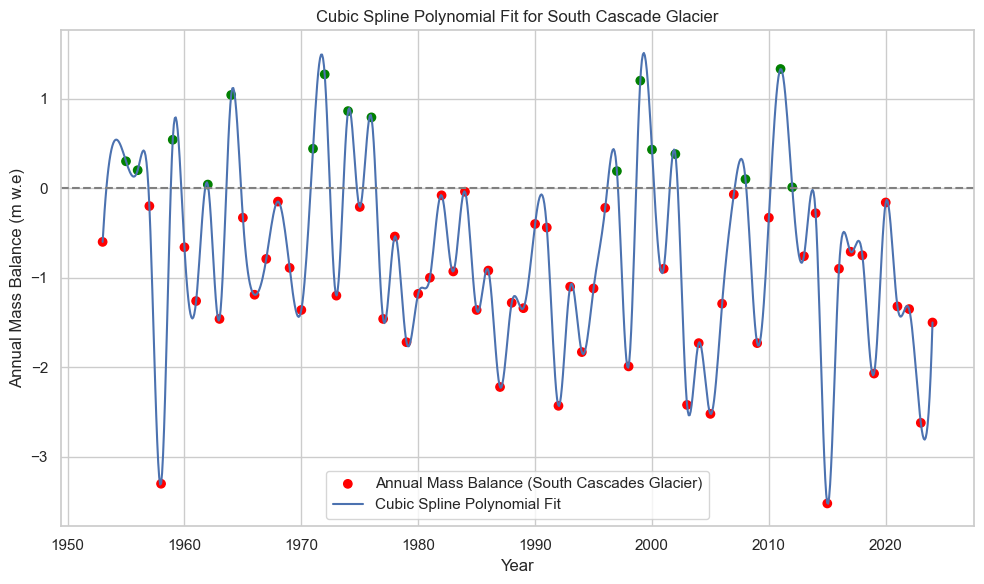

In [159]:
SouthCascade_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == 'SOUTH CASCADE']
print(SouthCascade_df[['year', 'annual_balance']].head(10))
x = [year for year, area in zip(SouthCascade_df['year'], SouthCascade_df['annual_balance']) if pd.notna(year) and pd.notna(area)]
y = [area for year, area in zip(SouthCascade_df['year'], SouthCascade_df['annual_balance']) if pd.notna(year) and pd.notna(area)]

cs = CubicSpline(x, y)
print(cs)

# Convert the data's years to months for step size in smooth plotting 
years_to_months = len(x) * 12

# Step 2: Generate a smooth range of x values for plotting
x_smooth = np.linspace(np.min(x), np.max(x), years_to_months)

# Step 3: Evaluate the polynomial
y_smooth = cs(x_smooth)

# Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
colors = ['green' if massBalanceValue > 0 else 'red' for massBalanceValue in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Annual Mass Balance (South Cascades Glacier)', color=colors)
plt.plot(x_smooth, y_smooth, '-', label='Cubic Spline Polynomial Fit')
#plt.plot(x_smooth, Polynomial(lagrange_polynomial_SouthCascade.coef[::-1])(x_smooth), label='Polynomial')
plt.title('Cubic Spline Polynomial Fit for South Cascade Glacier')
plt.xlabel('Year')
plt.ylabel('Annual Mass Balance (m w.e)')
#plt.ylim(0, np.max(SouthCascade_df['annual_balance'])*2)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

      year  annual_balance
7503  1956            1.39
7504  1957           -1.11
7505  1958           -1.66
7506  1959           -0.30
7507  1960           -0.28
7508  1961            0.47
7509  1962            0.21
7510  1963           -0.58
7511  1964            0.63
7512  1965           -0.56


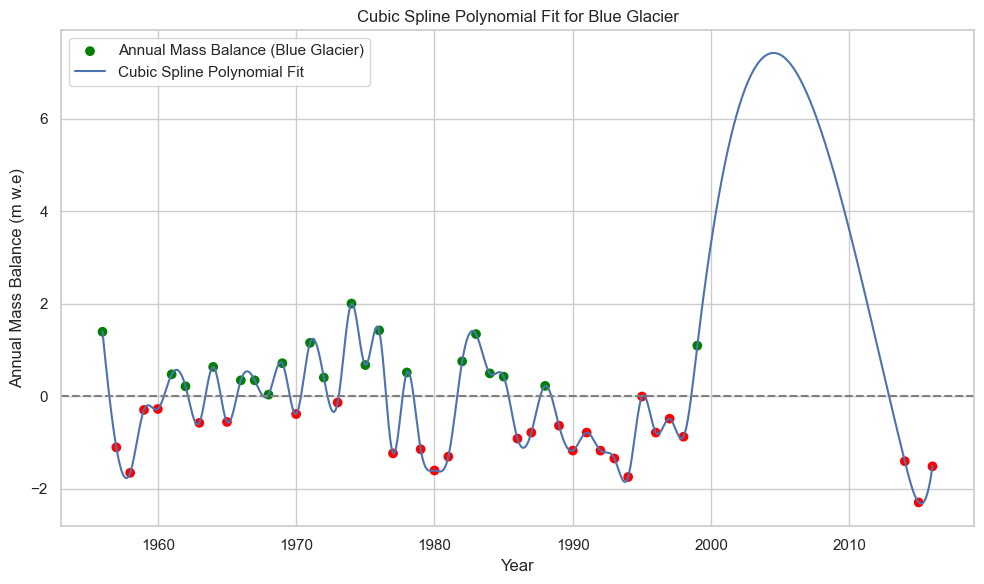

In [160]:
blueGlacier_Df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == 'BLUE GLACIER']
print(blueGlacier_Df[['year', 'annual_balance']].head(10))
x = [year for year, area in zip(blueGlacier_Df['year'], blueGlacier_Df['annual_balance']) if pd.notna(year) and pd.notna(area)]
y = [area for year, area in zip(blueGlacier_Df['year'], blueGlacier_Df['annual_balance']) if pd.notna(year) and pd.notna(area)]

cs = CubicSpline(x, y)
print(cs)

# Convert the data's years to months for step size in smooth plotting 
years_to_months = len(x) * 12

# Step 2: Generate a smooth range of x values for plotting
x_smooth = np.linspace(np.min(x), np.max(x), years_to_months)

# Step 3: Evaluate the polynomial
y_smooth = cs(x_smooth)

# Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
colors = ['green' if massBalanceValue > 0 else 'red' for massBalanceValue in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Annual Mass Balance (Blue Glacier)', color=colors)
plt.plot(x_smooth, y_smooth, '-', label='Cubic Spline Polynomial Fit')
#plt.plot(x_smooth, Polynomial(lagrange_polynomial_SouthCascade.coef[::-1])(x_smooth), label='Polynomial')
plt.title('Cubic Spline Polynomial Fit for Blue Glacier')
plt.xlabel('Year')
plt.ylabel('Annual Mass Balance (m w.e)')
#plt.ylim(0, np.max(blueGlacier_Df['annual_balance'])*2)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

      year  annual_balance
8009  1984            0.33
8010  1985           -0.22
8011  1986           -0.07
8012  1987           -0.30
8013  1988            0.17
8014  1989            0.03
8015  1990           -0.12
8016  1991            0.36
8017  1992           -1.38
8018  1993           -0.62


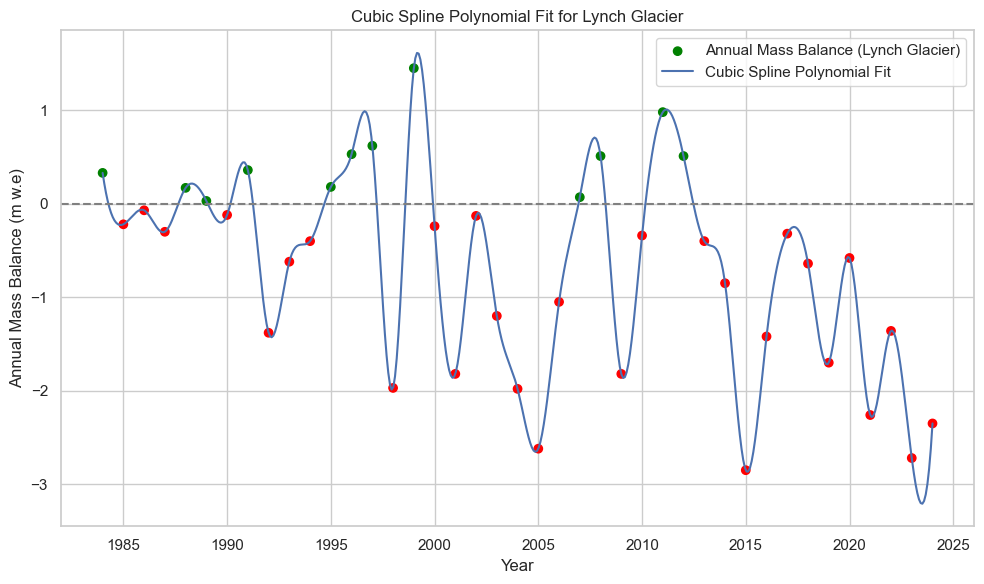

In [157]:
lynchGlacier_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == 'LYNCH']
print(lynchGlacier_df[['year', 'annual_balance']].head(10))
x = [year for year, area in zip(lynchGlacier_df['year'], lynchGlacier_df['annual_balance']) if pd.notna(year) and pd.notna(area)]
y = [area for year, area in zip(lynchGlacier_df['year'], lynchGlacier_df['annual_balance']) if pd.notna(year) and pd.notna(area)]

cs = CubicSpline(x, y)
print(cs)

# Convert the data's years to months for step size in smooth plotting 
years_to_months = len(x) * 12

# Step 2: Generate a smooth range of x values for plotting
x_smooth = np.linspace(np.min(x), np.max(x), years_to_months)

# Step 3: Evaluate the polynomial
y_smooth = cs(x_smooth)

# Create a color list based on the mass balance values: green for positive values (indicating growth); red for negative values (indicating recession)
colors = ['green' if massBalanceValue > 0 else 'red' for massBalanceValue in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Annual Mass Balance (Lynch Glacier)', color=colors)
plt.plot(x_smooth, y_smooth, '-', label='Cubic Spline Polynomial Fit')
#plt.plot(x_smooth, Polynomial(lagrange_polynomial_SouthCascade.coef[::-1])(x_smooth), label='Polynomial')
plt.title('Cubic Spline Polynomial Fit for Lynch Glacier')
plt.xlabel('Year')
plt.ylabel('Annual Mass Balance (m w.e)')
#plt.ylim(0, np.max(lynchGlacier_df['annual_balance'])*2)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()